<a href="https://colab.research.google.com/github/spandit98/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Soumyadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description**
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

#Importing the libraries and Dataset
First, we will be importing all the necessary libraries for our project, we'll add more further as per our requirement.

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
import seaborn as sns

#Importing the Dataset

In [ ]:
#Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')

# Understanding the dataset

In [ ]:
#Understanding the dataset
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##Data Summary
* The dataset has 21 features and 2,000 rows in total.
* The last column is given the target variable to work our models up on.
* There is no data in any datatype except float and integer.
* This dataset contains a mix of categorical, continuous and discrete data.
* All the categorical variables are pre-encoded which saves a lot of our time.


# Finding Null values
Here, we will be finding the null values and replace them or remove them if needed.

In [ ]:
#Finding null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Seems like there is no null value in this dataset!

##Finding duplicate values
We will be searching for duplicate values and dropping them.

In [ ]:
#Finding duplicate values
df.duplicated().sum()

0

Seems like the data is perfectly pre-processed.

##Preparing the dataset for EDA

In [ ]:
#Listing down all the features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#Since the target variable is given, seggregating dependent and independent variable
y = df['price_range']
x = df.drop('price_range', axis = 1)

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

#**Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on a dataset( import from CSV, Jason, and Html files) to summarize their main characteristics, often with visual methods and check assumptions with the help of summary statistics and graphical representations. EDA is used for analyzing what the data can tell us before the modeling or by applying any set of instructions/code. When you are working with the datasets, it is not easy to determine the important characteristics of the data by looking at the column of numbers or a whole spreadsheet/dataset. It may be tedious, boring, and/or overwhelming to determine experiences by seeing plain numbers. . Exploratory data analysis techniques have been devised as an aid in this situation.

##Distribution of price range

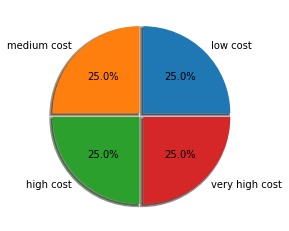

In [ ]:
#We'll see the distribution of price range over all the variables using a piechart
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
explode = (0.03,0.03,0.03,0.03)
fig1, ax1 = plt1.subplots()
ax1.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=360, labeldistance=1.1, wedgeprops = {'linewidth': 3})
plt1.show()

The variables are equally occupied on all the price ranges.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

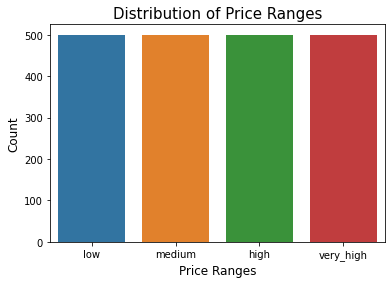

In [ ]:
#Visualising the same using a bar graph
sns.countplot(df["price_range"])
plt1.title("Distribution of Price Ranges" , fontsize = 15)
plt1.xlabel("Price Ranges" ,  fontsize = 12)
plt1.ylabel("Count" , fontsize = 12)
plt1.xticks(fontsize = 10 , labels= ["low" , "medium" , "high" , "very_high"] , ticks = [0,1,2,3])
plt1.yticks(fontsize = 10)

In [ ]:
#seggregating the columns into categorical, continuous and discrete variables depending on the nature of their data respectively to smoothen our identification during EDA
cat_col=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
discrete = ['battery_power','px_height','px_width','ram']
cont_col = ['clock_speed','fc','mobile_wt','int_memory','talk_time','sc_h','sc_w', 'm_dep']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Counting the no. of phones in the variables with categorical data

---



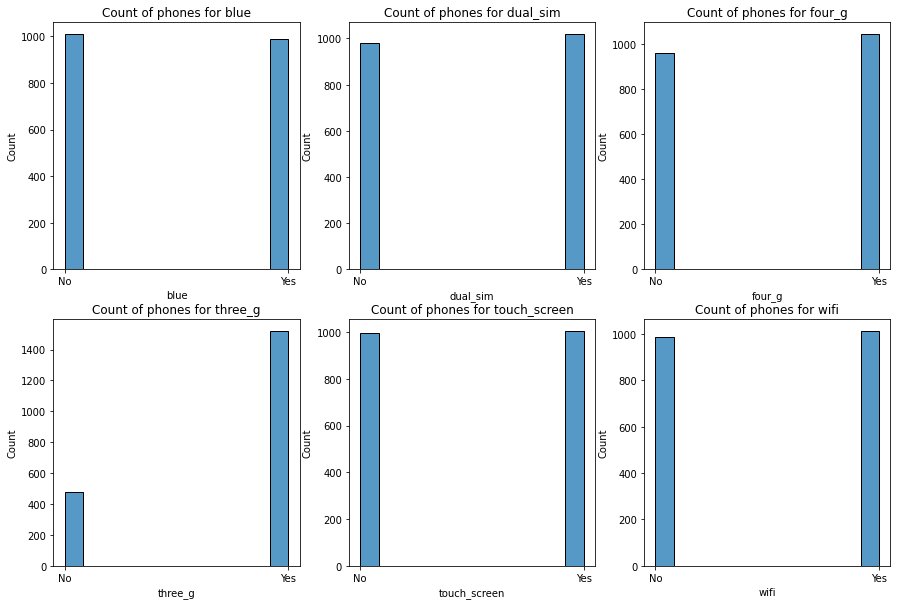

In [ ]:
#Enlisting categorial variables
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

# visualizing the count of each by running a for loop
plt1.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt1.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt1.xticks(xtick,label)
  sns.histplot(df[item])
  plt1.title(f'Count of phones for {item}')

### **Observations**:
* The trends show that the no. of phones that have Bluetooth, dual sim, 4G, touch screen and wifi, almost equals to the no. of phones which don't have them.
* There are few phones which don't have either 4G nor they have 3G support, in this case, let's assume they are using 2G phones or least probably 1G phones.

##Counting the no. of phones in the variables with discrete values

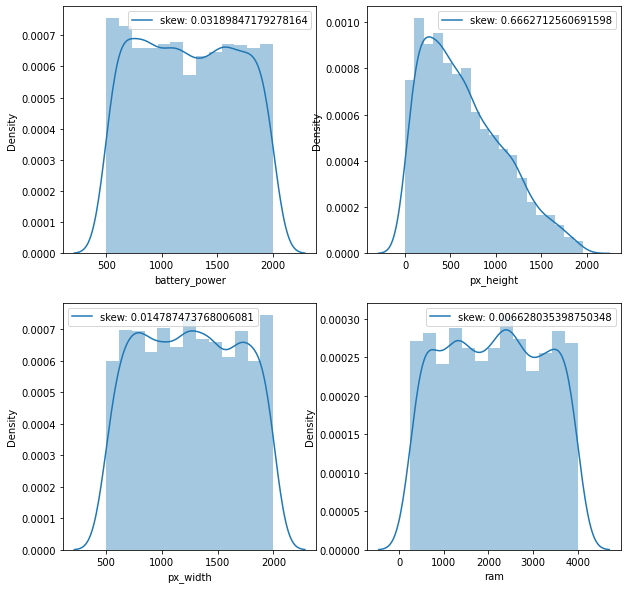

In [ ]:
c= 1
# visualizing the count of each by running a for loop
plt1.figure(figsize = (10,10))
for i in discrete:
    plt1.subplot(2,2,c)
    c=c+1
    sns.distplot(df[i])
    plt1.legend(['skew: '+str(df[i].skew())])

### **Observations:**
* The count of phones is equally distributed among all the parameters in every variable except pixel height.
* The number of phones tends to decrease as we go higher in pixel height, i.e. we can say that the graph is positively skewed. 

## Counting the no. of phones in the variables with continuous values

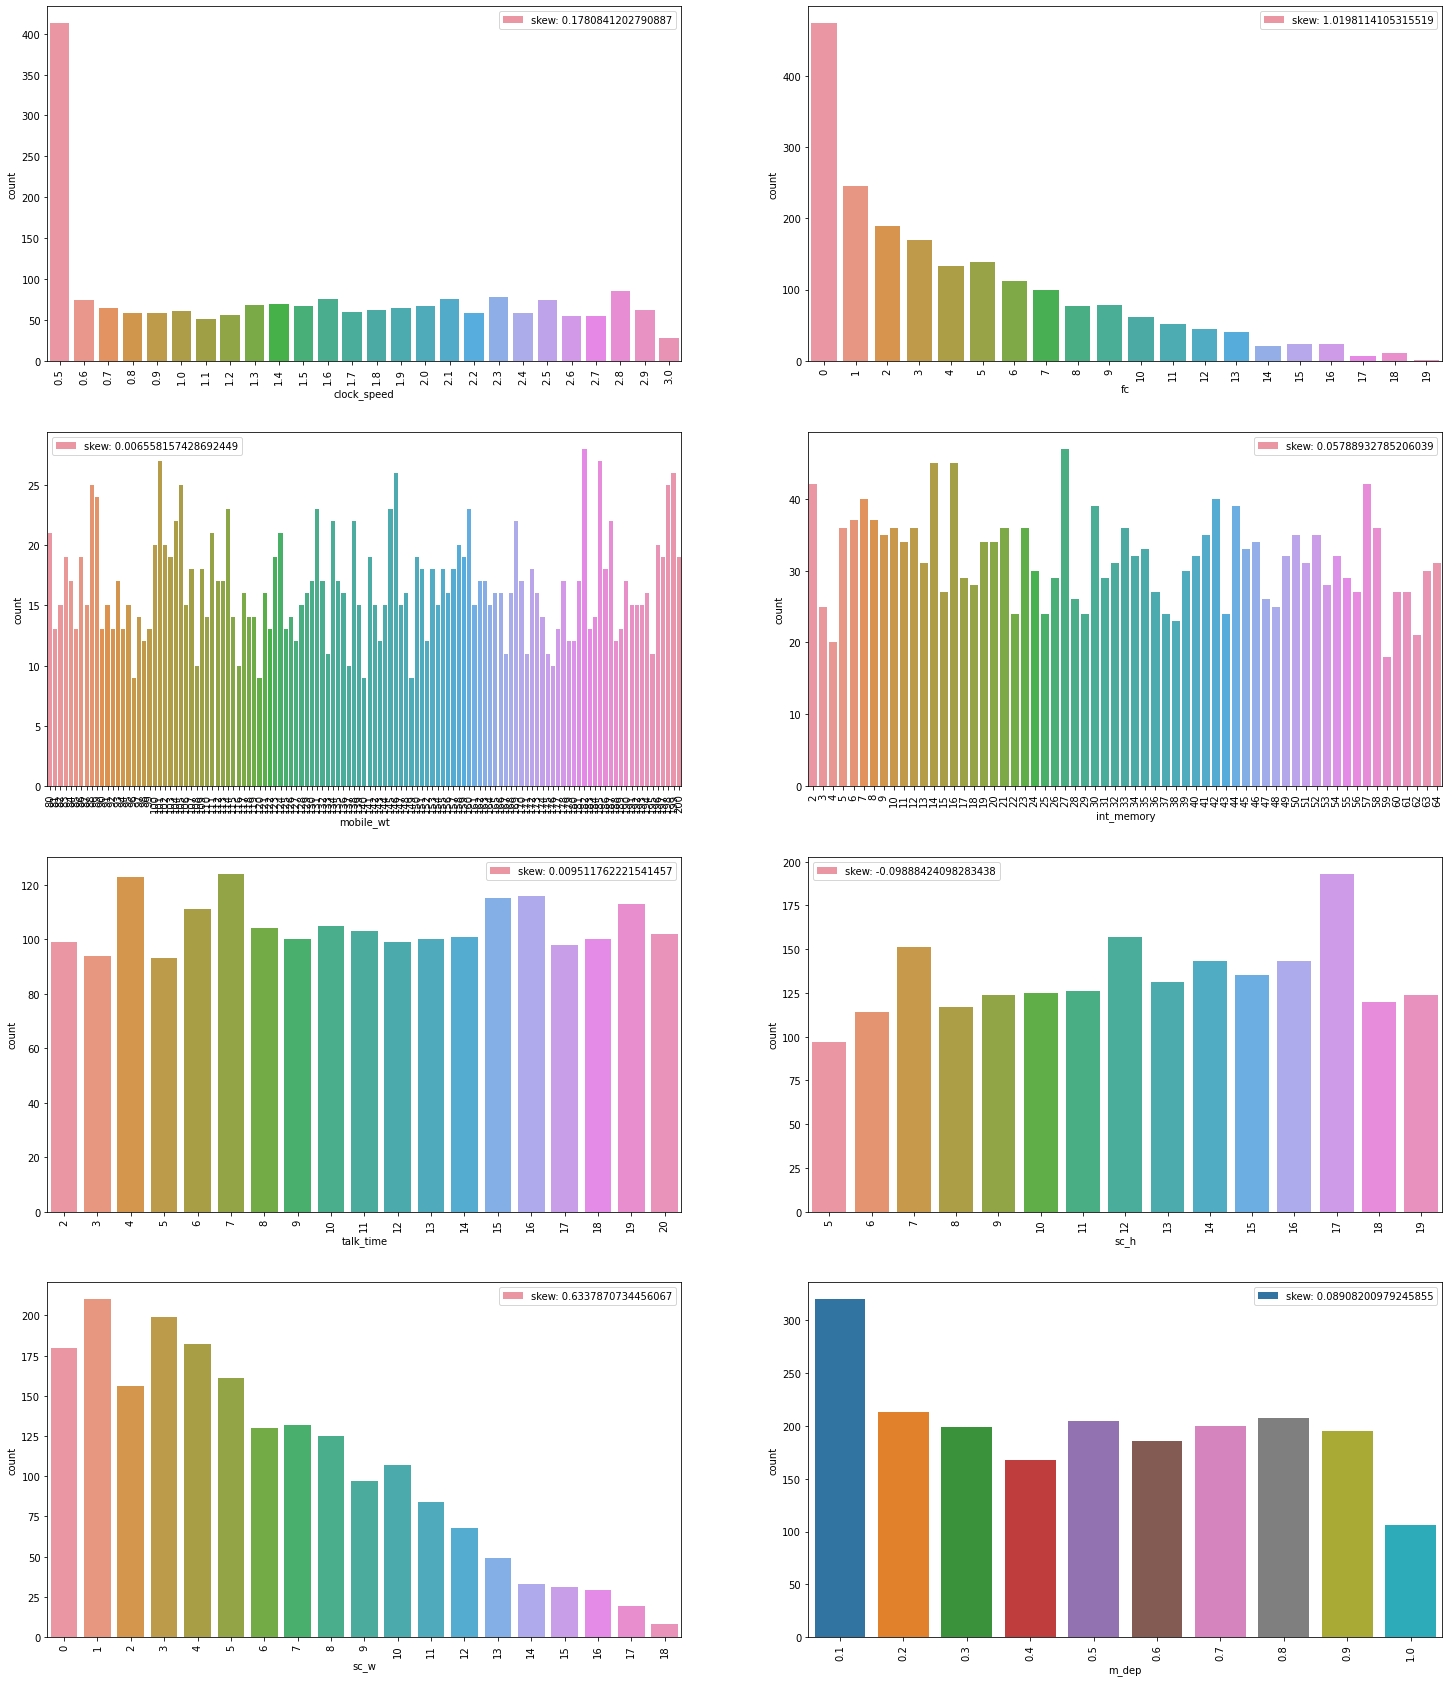

In [ ]:
c= 1
plt1.figure(figsize = (25,30))
for i in cont_col:
    plt1.subplot(4,2,c)
    c=c+1
    sns.countplot(df[i])
    
    plt1.legend(['skew: '+str(df[i].skew())])
    plt1.xticks(rotation=90)

###**Observations:**
* The clock speed with 0.5GHz stands out in popularity among other phones. Rest of them have even distribution over the sales.
* The phones with higher megapixeled camera doesn't show a great relevance amongst the customers.
* All the rest of features has shown a symmetric skewness in their sales numbers, except for screen width.


**Bluetooth, 4g, 3g, dual_sim, wifi, Touchscreen vs price range** 

In [ ]:
# grouping price range with each of these variables
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

blue      dual_sim      four_g      three_g      touch_screen      wifi     
     0    1        0    1      0    1       0    1            0    1    0    1
0  257  243      250  250    241  259     127  373          238  262  252  248
1  255  245      245  255    238  262     122  378          239  261  248  252
2  257  243      251  249    253  247     113  387          265  235  248  252
3  241  259      235  265    225  275     115  385          252  248  238  262

Text(0, 0.5, 'No. of phones')

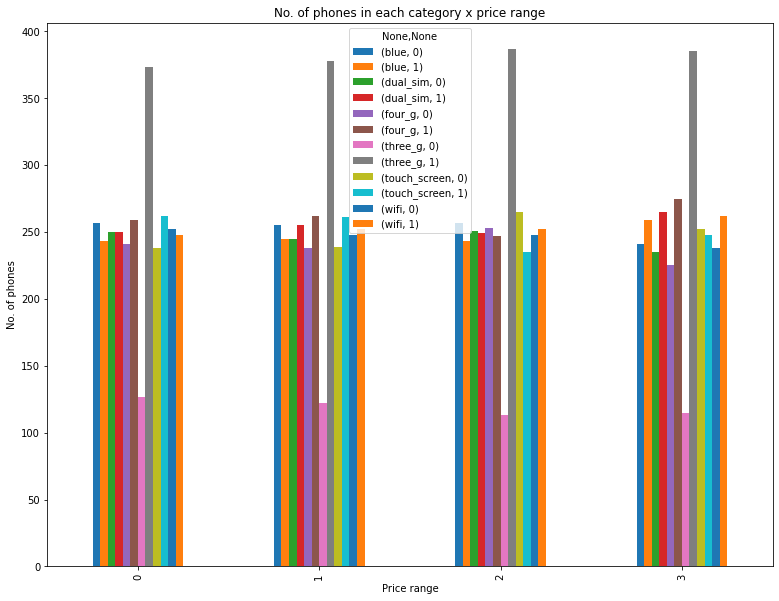

In [ ]:
# visualizing using barplot
plt1.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt1.title('No. of phones in each category x price range')
plt1.xlabel('Price range')
plt1.ylabel('No. of phones')

It looks like all the price ranges have almost equal no. of observations for both supported and unsupported type specifications.

**n_cores and m_depth vs price range**

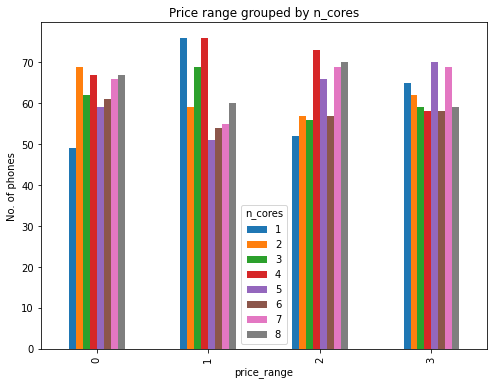

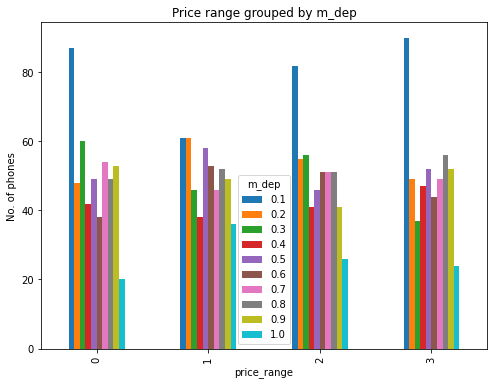

In [ ]:
list1=['n_cores','m_dep']
for item in list1:
  plt1.rcParams['figure.figsize']=(8,6)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt1.title(f'Price range grouped by {item}')
  plt1.ylabel('No. of phones')

1. Count of lesser nos. of cores is high for 0 and 1 price range.

2. Count of higher nos. of cores is high for 2 and 3 price range.

3. Count of phones with less thickness is high and count of phones with high thickness is low.

**Variables having high range values: Battery power, pixel height, pixel width, ram vs price range**

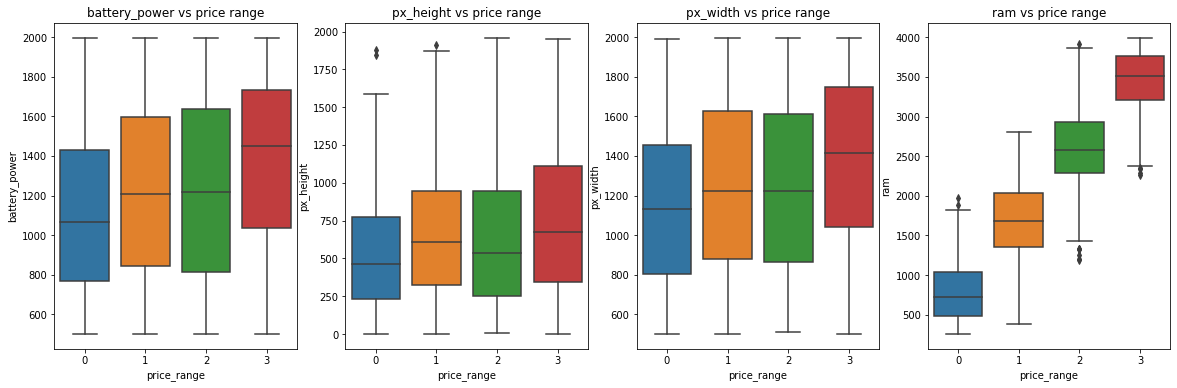

In [ ]:
# visualizing price range grouped by these variables using boxplot
list1=['battery_power','px_height','px_width','ram']
plt1.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt1.subplot(1,4,index+1)
  plt1.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

Mean values of battery power, px_height, px_width, ram is increasing with increase in prices.

Let us also visualize using point plot that will show us a clear trend.

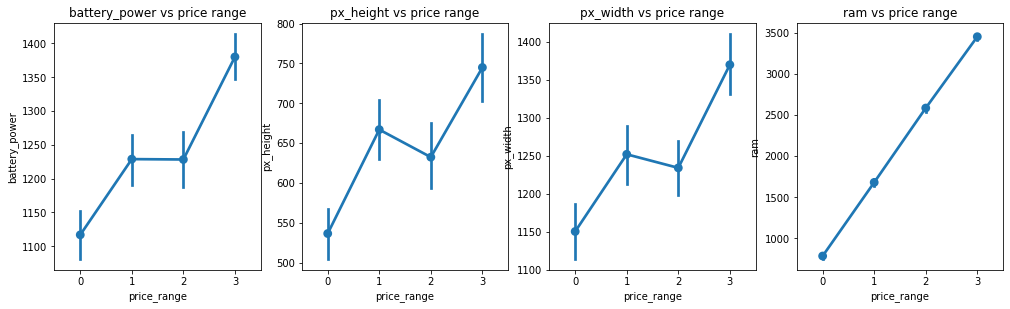

In [ ]:
plt1.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt1.subplot(2,4,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

It appears that the values of these variables are rising in lockstep with the rise in prices. Ram is having an immediate effect. The more RAM you have, the more money you'll spend!

###**Detecting and removing outliers if any**

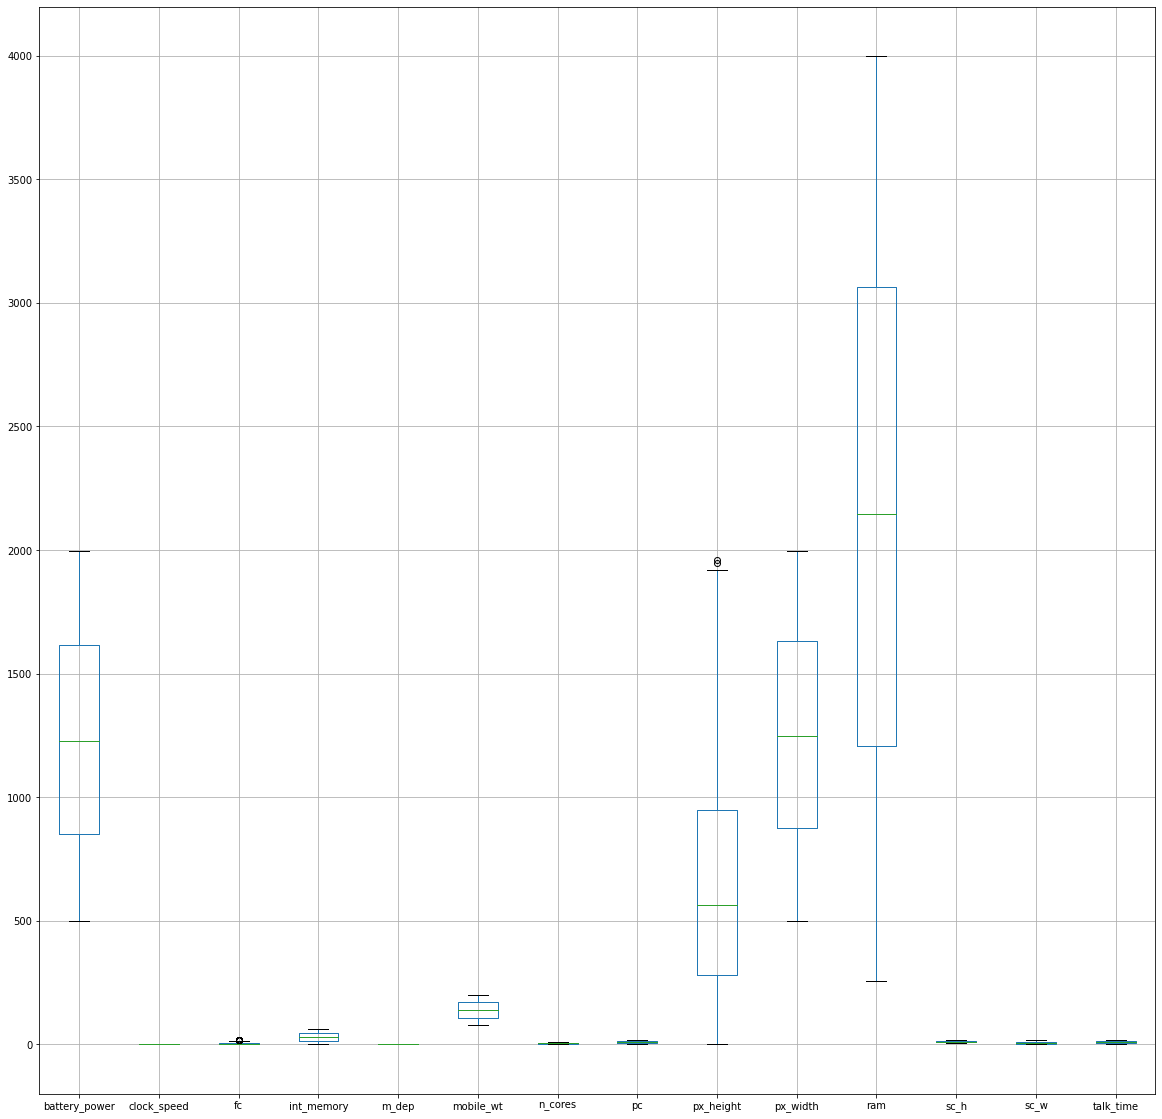

In [ ]:
# checking outliers for discrete and continous type variables using box plot
fig = plt1.figure(figsize =(20, 20))
data = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
# Creating plot
#plt1.boxplot(data)
boxplot = df.boxplot(column=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

# show plot
plt1.show()

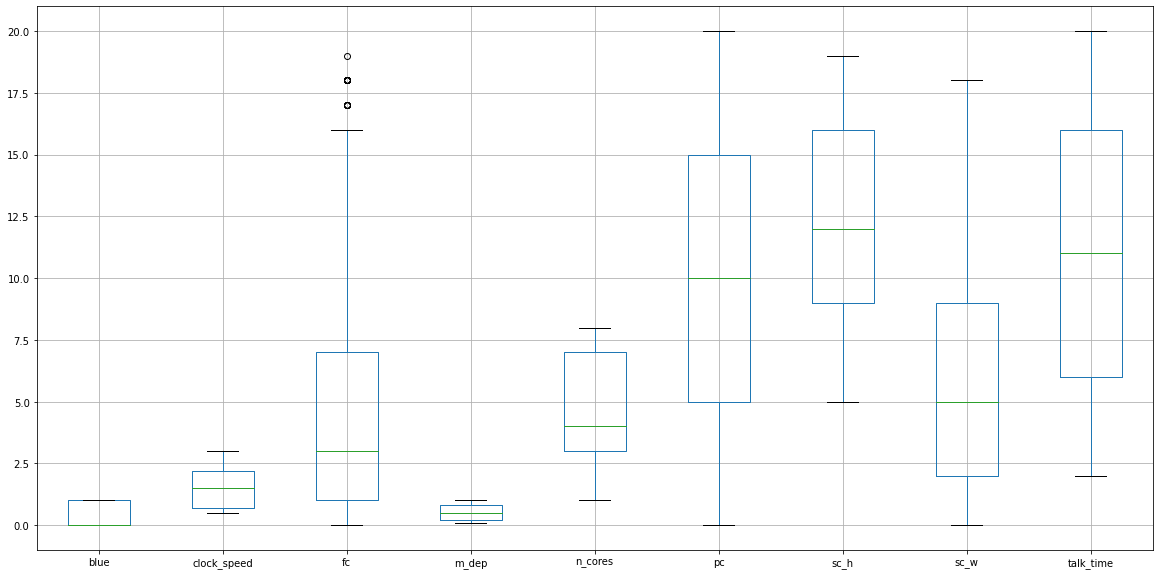

In [ ]:
fig = plt1.figure(figsize =(20, 10))


boxplot = df.boxplot(column=['blue','clock_speed', 'fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time'])
plt1.show()

We can see that we have outliers in px_height and fc

In [ ]:
new_df = df.copy()

In [ ]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3 — Q1
#  lower_range = Q1 — (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [ ]:
Q1 = new_df["fc"].quantile(0.25)
Q3 = new_df['fc'].quantile(0.991)
IQR = Q3-Q1

new_df = new_df[(new_df['fc'] <= Q3)]

In [ ]:
new_df.shape

(1982, 21)

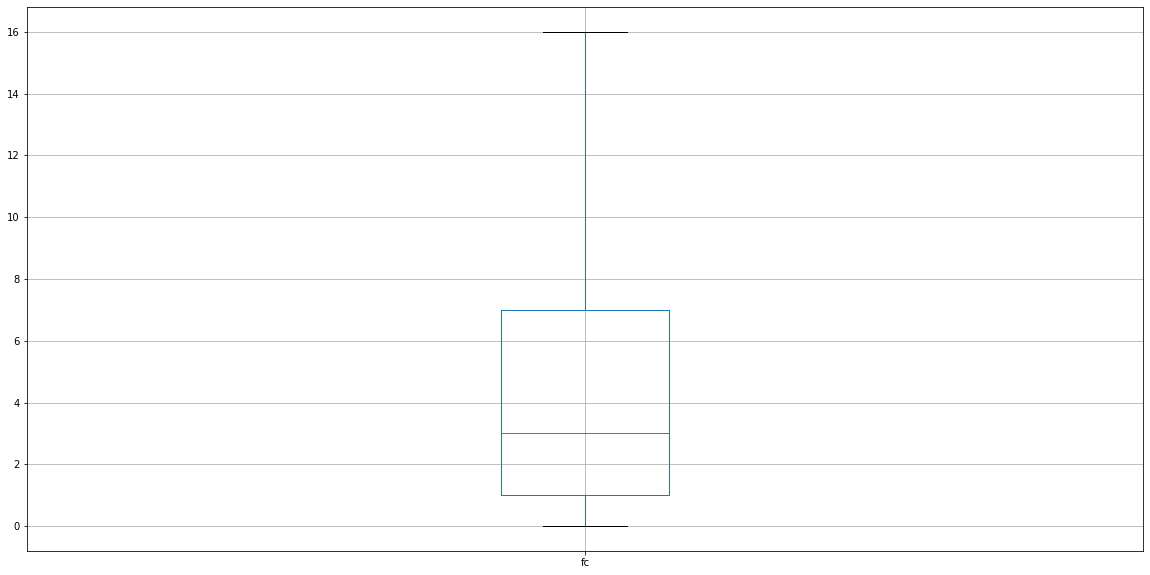

In [ ]:
fig = plt1.figure(figsize =(20, 10))


boxplot = new_df.boxplot(column=['fc'])
plt1.show()

In [ ]:
Q3 = new_df['px_height'].quantile(0.999)

new_df = new_df[(new_df['px_height'] <= Q3)]

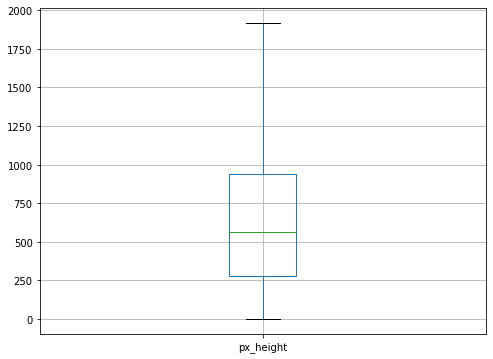

In [ ]:
boxplot = new_df.boxplot(column=['px_height'])

# show plot
plt1.show()

We fixed our outliars!

##Finding Correlation in the data


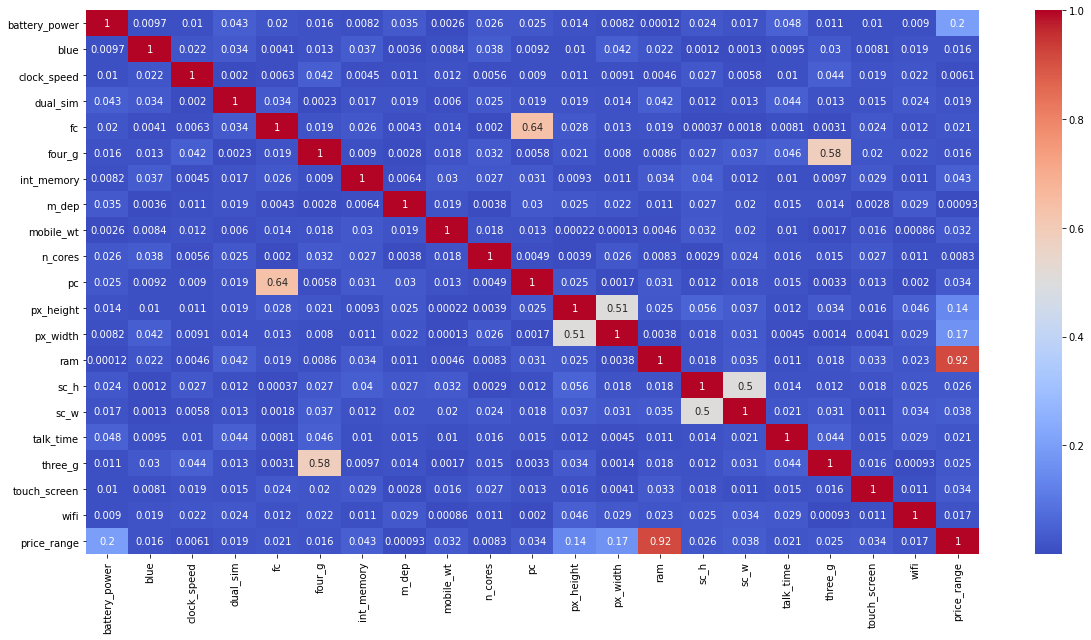

In [ ]:
# Finding correlation amongst the variables
corr=new_df.corr()
plt1.figure(figsize=(20,10))
sns.heatmap(abs(corr),cmap='coolwarm',annot=True)


**Observations**:

1. pc is correlated with fc.

2. 3g and 4g are moderately correlated.

3. sc_h and sc_w are moderately correlated. We will try to change them into a single variable.

4. px_width and px_height are moderately correlated. We will try to change them into a single variable.

5. ram is highly correlated with our price range. May be one the most important factor in determining the price.

#**Data Pre-processing**

##Feature Selection
When creating a predictive model, feature selection is the process of minimising the number of input variables. In fact, all of the variables in a dataset are practically never significant when creating a machine learning model. 

Duplicate variables diminish a classifier's accuracy rate and reduce the model's generalisation ability. Adding extra variables to a model also increases the model's overall complexity. 

To reduce modelling computational costs and, in some cases, improve model performance, it's best to keep the number of input variables to a minimum.

In [ ]:
indep_var = df.iloc[:,0:20]  #independent columns
dep_var = df.iloc[:,-1]

In [ ]:
# Select best 15 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(indep_var, dep_var)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(indep_var.columns)
#concat two dataframes for better visualization 
feat_imp = pd.concat([dfcolumns,dfscores],axis=1)
feat_imp.columns = ['Specs','Score']  #naming the dataframe columns
print(feat_imp.nlargest(15,'Score'))  #print 15 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820


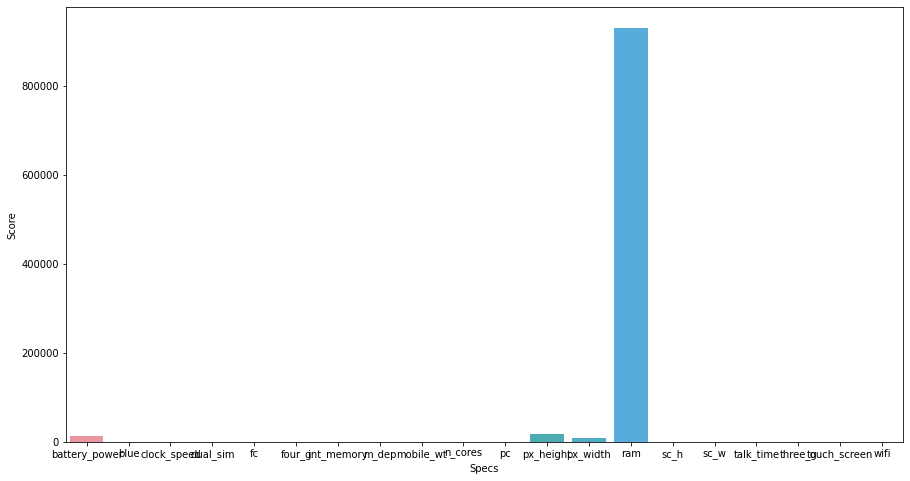

In [ ]:
#Visualising the important features
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feat_imp['Specs'], y=feat_imp['Score'])
plt1.show()

Ram, battery power, pixel height and pixel width standing out with it's values, minimising the other bars, we need to check in detail by only keeping the values below 100 temporarily.

In [ ]:
#Keeping the columns with value above 100 aside to understand the other important features
temp_df= feat_imp.drop(index=[0,11,12,13])

In [ ]:
temp_df

,Specs,Score
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556
10,pc,9.186054


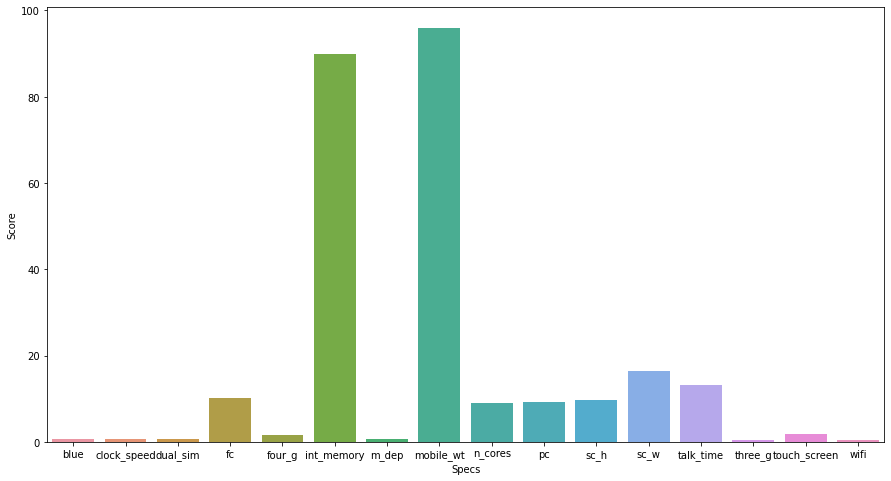

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=temp_df['Specs'], y=temp_df['Score'])
plt1.show()

The most important features, as per both graphs are 
* Ram
* Battery Power
* Pixel height
* Pixel width
* Mobile weight
* Internal memory
* Front Camera megapixels
* Number of cores
* Primary Camera megapixels
* Screen height
* Screen width
* Talk time

Rest of the columns we can drop and run our models on to predict the values.

In [ ]:
#Dropping the columns with importance value below 9
X=df[['ram', 'battery_power', 'px_height', 'px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','pc','n_cores']]
Y=df['price_range']

##Train Test Spilt
When machine learning algorithms are used to make predictions on data that was not used to train the model, the train-test split process is used to measure their performance.

It's a quick and simple technique that allows you to compare the performance of different machine learning algorithms for your predictive modelling problem. Although the process is straightforward to use and interpret, there are occasions when it should not be utilised, such as when you have a tiny dataset or when further configuration is required, such as when it is used for classification and the dataset is not balanced.

In [ ]:
# Appying the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20,random_state=42,stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 12)
(400, 12)
(1600,)
(400,)


##Scaling the data
This means we're altering our data to fit into a specified scale, such as 0-100 or 0-1. When we're employing methods like k-nearest neighbours (KNN), we'll want to scale our data.

In [ ]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Predictive Modelling**
Predictive modelling is a method of using data modelling to anticipate future consequences. It's one of the most effective ways for a company to envision its future and make strategies appropriately. While not perfect, this method has a high rate of accuracy, which is why it is so popular and widespread.

##Algorithms and methods to be used to apply predictive modelling
1. Decision Tree Classifier
2. Random Forest Classifier (With & Without Hyperparameter tuning)
3. Gradient Boosting Classifier (With & Without Hyperparameter tuning)
4. XGBoost Classifier (With & Without Hyperparameter tuning)
5. K-Nearest Neighbours (With & Without Hyperparameter tuning)

##**Decision Tree Classifier**

In [ ]:
# Importing evaluation metrics-library
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clsr = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
clsr.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
y_pred_train = clsr.predict(X_train)

In [ ]:
accuracy_score(Y_train, y_pred_train)

1.0

In [ ]:
accuracy_score(Y_test, y_pred)

0.8475

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       105
           1       0.76      0.87      0.81        91
           2       0.79      0.71      0.75        92
           3       0.88      0.91      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



In [ ]:
class_names = ['low cost','medium cost', 'high cost', 'very high cost']

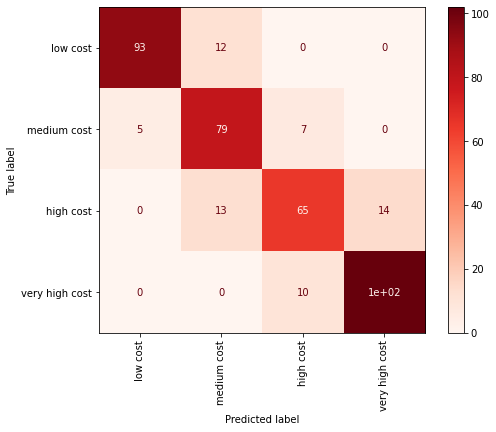

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model
plot_confusion_matrix(clsr, X_test, Y_test, cmap=plt1.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

###**Observations:**
1. The overall accuracy score on our test data is 83%.
2. Prediction accuracy on class 1 (Low Cost) is 93%.
3. Prediction accuracy on class 2 (Medium Cost) is 81%.
4. Prediction accuracy on class 3 (High Cost) is 65%.
5. Prediction accuracy on class 4 (Low Cost) is 100%.
As a result, we can see that the Decision Tree Classifier has performed good overall, and best in class 4.

Our model tended to overfit, let's try our next model.

In [ ]:
#Checking the important features as per the decision tree classifier
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Specs,Score
0,ram,0.628479
1,battery_power,0.135504
2,px_height,0.077026
3,px_width,0.075261
4,mobile_wt,0.015967


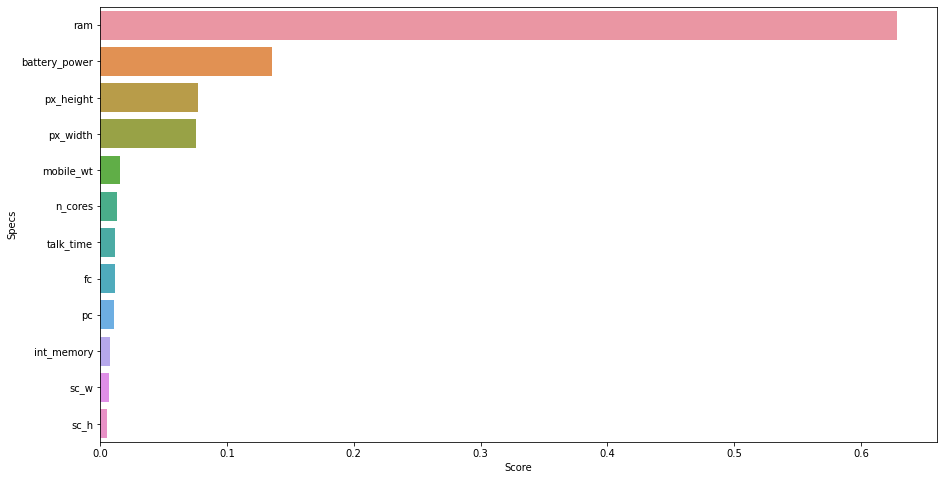

In [ ]:
#Visualising the important features
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Specs'])
plt1.show()

In [ ]:
#Visualising the classification problem
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

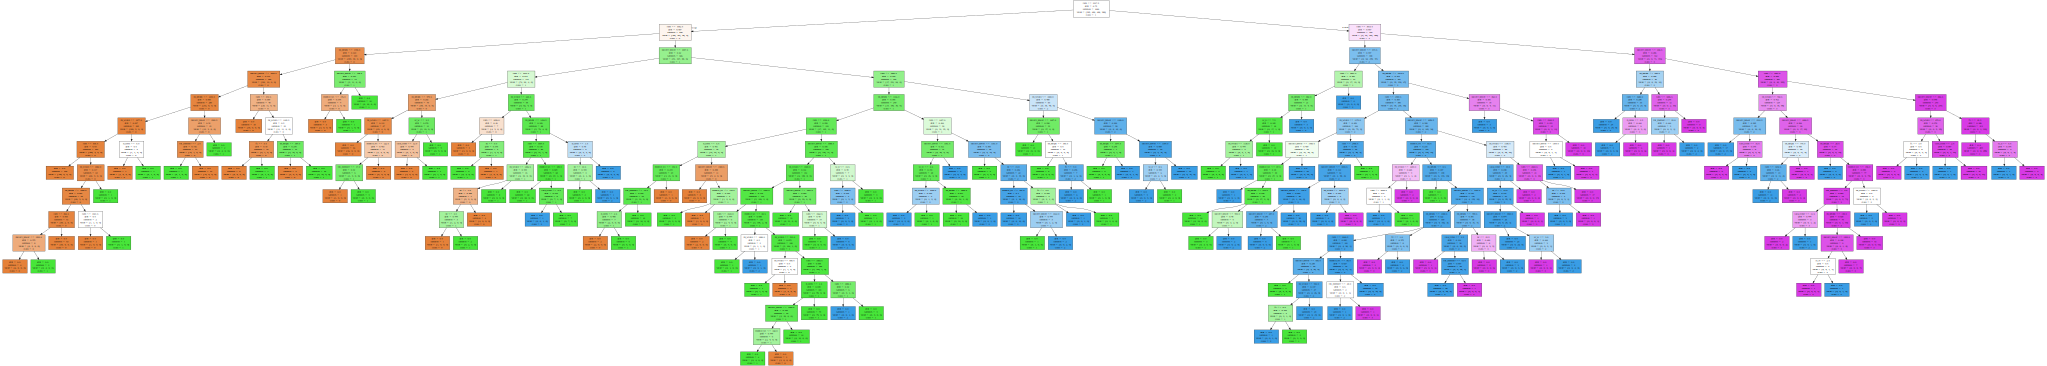

In [ ]:
graph = Source(tree.export_graphviz(clsr, out_file=None
   , feature_names=X.columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

##**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clsr = RandomForestClassifier(n_estimators=150)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
rf_clsr.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
y_pred_train = clsr.predict(X_train)

In [ ]:
accuracy_score(Y_train, y_pred_train)

1.0

In [ ]:
accuracy_score(Y_test, y_pred)

0.8475

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       105
           1       0.76      0.87      0.81        91
           2       0.79      0.71      0.75        92
           3       0.88      0.91      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



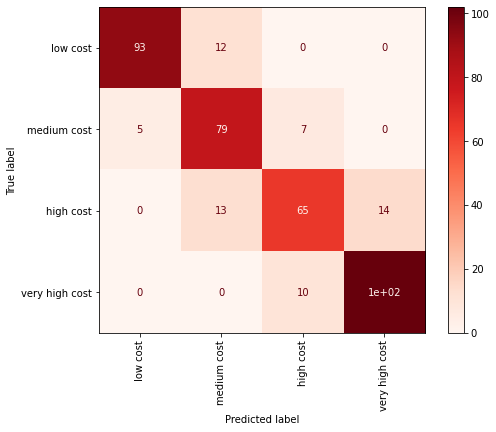

In [ ]:
plot_confusion_matrix(clsr, X_test, Y_test, cmap=plt1.cm.Reds, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

###**Observations:**
1. The overall accuracy score on our test data is 84%.
2. Prediction accuracy on class 1 (Low Cost) is 93%.
3. Prediction accuracy on class 2 (Medium Cost) is 80%.
4. Prediction accuracy on class 3 (High Cost) is 63%.
5. Prediction accuracy on class 4 (Low Cost) is 100%.
As a result, we can see that the Random Forest Classifier has performed good overall, and best in class 4.

Random forest tends to overfit too, let's tune it a bit.

In [ ]:
#Checking the important features with Random Forest Classifier
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.628479
1,battery_power,0.135504
2,px_height,0.077026
3,px_width,0.075261
4,mobile_wt,0.015967


##**Hyperparameter tuning with Random forest**

In [ ]:
#Hyperparameter tuning for Random Forest
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None]
          }

In [ ]:

rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=5)
clsr.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clsr.best_params_

{'max_depth': 20,
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 700}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clsr.best_score_

0.9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clsr = clsr.best_estimator_

In [ ]:
clsr.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
y_pred_train = clsr.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

1.0

In [ ]:
accuracy_score(y_test, y_pred)


0.9075

Even though the model performance has improved, there is still a room for improvement.

 Our best parameters are:

max_depth = 20,

max_leaf_nodes = None,

min_samples_split = 2,

n_estimators = 700

##**Gradient Boosting Classifier**

In [ ]:
# Predticting using Gradient Boosting Classier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
clsr = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1)


In [ ]:
clsr.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_train = clsr.predict(X_train)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
accuracy_score(y_train,y_pred_train)

1.0

In [ ]:
accuracy_score(y_test,y_pred)


0.92

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.88      0.92      0.90        91
           2       0.88      0.87      0.87        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



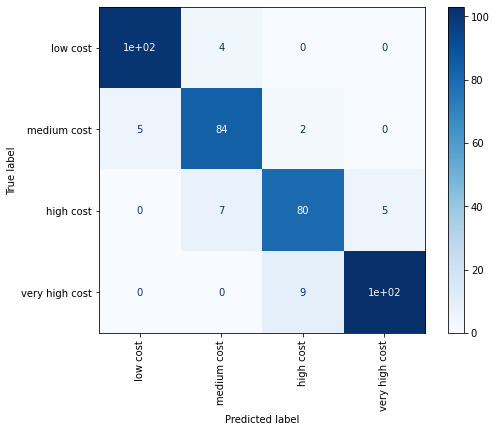

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Blues, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

###**Observations:**
1. The overall accuracy score on our test data is 92%.
2. Prediction accuracy on class 1 (Low Cost) is 100%.
3. Prediction accuracy on class 2 (Medium Cost) is 84%.
4. Prediction accuracy on class 3 (High Cost) is 80%.
5. Prediction accuracy on class 4 (Low Cost) is 100%.
As a result, we can see that the Gradient Boosting Classifier has performed good overall, and best in class 1 & class 4.

In [ ]:
#checking the important features with Gradient boosting
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.879454
1,battery_power,0.057205
2,px_height,0.028360
3,px_width,0.023105
4,mobile_wt,0.004629


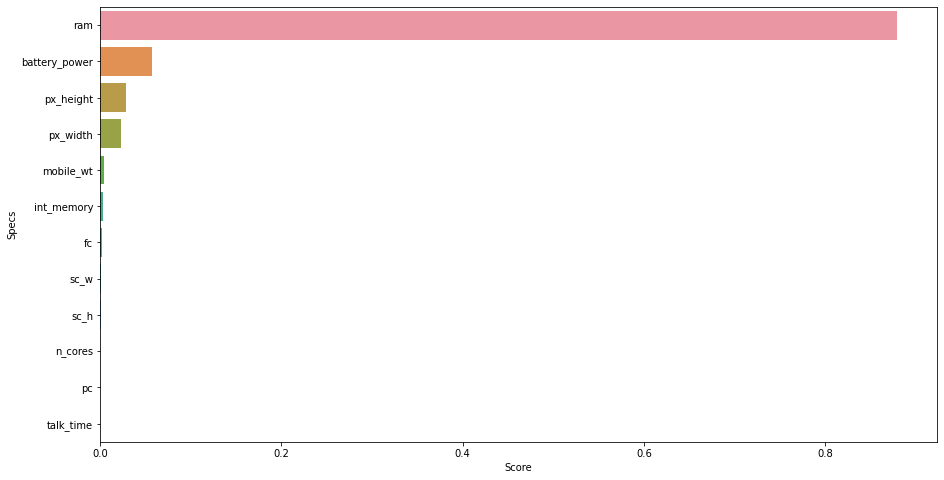

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Specs'])
plt1.show()

##**Hyperparameter tuning with Gradient Boosting**

In [ ]:
#Hyper parameter tuning with GB Classifier
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {'n_estimators':[50,100,300,500],
          'max_depth':[3,8,10],
          'learning_rate':[.01,.1,.005,1],
          'max_features':['sqrt','auto'],
          }

In [ ]:
gb = GradientBoostingClassifier()

clsr = GridSearchCV(gb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
 clsr.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
y_pred_train = clsr.best_estimator_.fit(X_train, y_train).predict(X_train)

In [ ]:
y_pred = clsr.best_estimator_.fit(X_train, y_train).predict(X_test)


In [ ]:
accuracy_score(y_train,y_pred_train)

1.0

In [ ]:
accuracy_score(y_test,y_pred)


0.9075

###**Observations:**
The overall test accuracy in case of hyperparameter tuning on Gradient Boosting has been decreased by 2%

##**XG Boost**

In [ ]:
#XG Boost
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from xgboost.sklearn import XGBClassifier


In [ ]:
clsr = XGBClassifier(n_estimators=300)


In [ ]:
clsr.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clsr.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)


0.9125

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.86      0.86      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



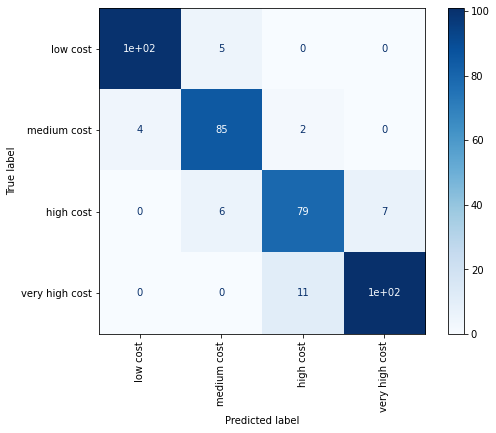

In [ ]:
plot_confusion_matrix(clsr, X_test, y_test, cmap=plt1.cm.Blues, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

###**Observations:**
1. The overall accuracy score on our test data is 91%.
2. Prediction accuracy on class 1 (Low Cost) is 100%.
3. Prediction accuracy on class 2 (Medium Cost) is 85%.
4. Prediction accuracy on class 3 (High Cost) is 79%.
5. Prediction accuracy on class 4 (Low Cost) is 100%.
As a result, we can see that the XG Boost Classifier has performed good overall, and best in class 1 & class 4.

In [ ]:
# Checking the best features using XG Boost
feature_importance = pd.DataFrame({'Specs':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()


,Specs,Score
0,ram,0.491168
1,battery_power,0.131877
2,px_height,0.100290
3,px_width,0.075866
4,mobile_wt,0.042623


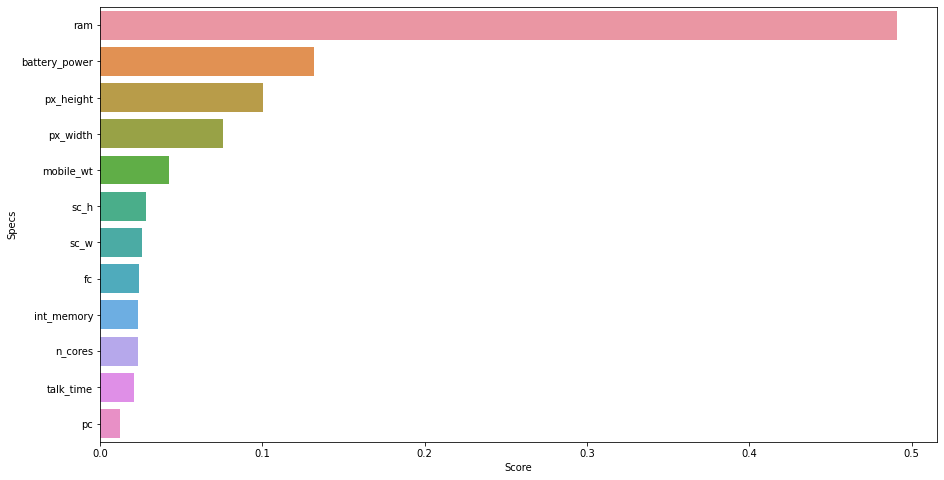

In [ ]:
fig, ax = plt1.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Specs'])
plt1.show()

##**Hyperparameter tuning with XG Boost**

In [ ]:
#Hyperparameter Tuning with XG Boost
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[300,500,1000],
          'learning_rate':[.1,.01,.05,1],
          }

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 1],
                         'n_estimators': [300, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, ret

In [ ]:
clsr.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [ ]:
# let's add some other parameters as well
params = {'n_estimators':[300],
          'learning_rate':[1],
          'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
          }

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1], 'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators'

In [ ]:
clsr.best_params_


{'learning_rate': 1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300}

In [ ]:

# add gamma
params = {'learning_rate':[ 1],
 'max_depth': [9],
 'min_child_weight': [1],
 'n_estimators': [300],
 'gamma':[i/10.0 for i in range(0,5)]}

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [1], 'max_depth': [9],
                         'min_child_weight': [1], '

In [ ]:
clsr.best_params_


{'gamma': 0.0,
 'learning_rate': 1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 300}

In [ ]:
#add alpha
params = {'learning_rate':[ 1],
 'max_depth': [9],
 'min_child_weight': [1],
 'n_estimators': [300],
 'gamma':[0],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100, 0, 0.001, 0.005, 0.01, 0.05]}

In [ ]:
xgb = XGBClassifier()

clsr = GridSearchCV(xgb, params, cv=5)
clsr.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0], 'learning_rate': [1], 'max_depth': [9],
                         'min_child_weight': [1], 'n_estimators': [300],
                         

In [ ]:
clsr.best_params_


{'gamma': 0,
 'learning_rate': 1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 300,
 'reg_alpha': 0.005}

In [ ]:
# lets check model
clsr.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
y_pred_train = clsr.best_estimator_.fit(X_train,y_train).predict(X_train)

In [ ]:
y_pred = clsr.best_estimator_.fit(X_train,y_train).predict(X_test)


In [ ]:
accuracy_score(y_train, y_pred_train)

1.0

In [ ]:
accuracy_score(y_test, y_pred)


0.9175

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.89      0.93      0.91        91
           2       0.87      0.89      0.88        92
           3       0.95      0.90      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Overall accuracy of hyperparameter tuning on XG Boost has also been 91%.

##**K-Nearest Neighbours**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

# Applying the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# Training Score
train_score=knn.score(X_train,y_train)
print('KNeighborsClassifier training score:',train_score)

KNeighborsClassifier training score: 0.9475


In [ ]:
# Predictions on the train and test data
Y_test_knn=knn.predict(X_test)
Y_train_knn=knn.predict(X_train)

In [ ]:

# Printing the predicted output
print(Y_test_knn)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 2 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 2 2 1 0 3 3 1 3 3 3
 2 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 1 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 2
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2]


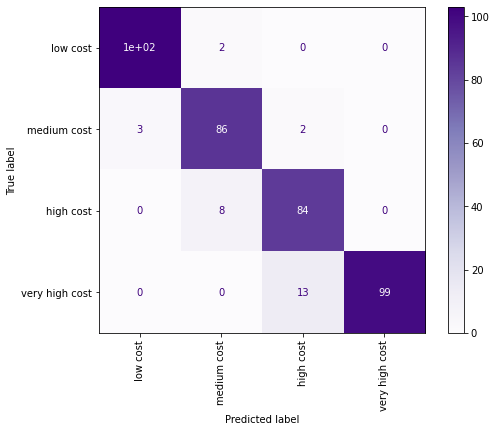

In [ ]:

plot_confusion_matrix(knn, X_test, y_test, cmap=plt1.cm.Purples, display_labels=class_names, xticks_rotation='vertical')
plt1.show()

In [ ]:
test_accu1=accuracy_score(y_test,Y_test_knn)
train_accu1=accuracy_score(y_train,Y_train_knn)


print('Train Accuracy Score:',train_accu1)
print('Test Accuracy Score:',test_accu1)

Train Accuracy Score: 0.9475
Test Accuracy Score: 0.93


In [ ]:

# Here, we find the classification report
print(classification_report(y_test,Y_test_knn))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.90      0.95      0.92        91
           2       0.85      0.91      0.88        92
           3       1.00      0.88      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



###**Observations:**
1. The overall accuracy score on our test data is 93%.
2. Prediction accuracy on class 1 (Low Cost) is 100%.
3. Prediction accuracy on class 2 (Medium Cost) is 86%.
4. Prediction accuracy on class 3 (High Cost) is 84%.
5. Prediction accuracy on class 4 (Low Cost) is 99%.
As a result, we can see that the Gradient Boosting Classifier has performed good overall, and best in class 1.

##**Hyperparameter Tuning for KNN**

In [ ]:
#Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
print('The best value of K is',model.best_params_['n_neighbors'])

The best value of K is 11


In [ ]:
# Fitting the model for k=11
model_knn = KNeighborsClassifier(n_neighbors=11)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
# Training Score
train_score2=model_knn.score(X_train,y_train)
print('KNeighborsClassifier training score:',train_score2)

KNeighborsClassifier training score: 0.951875


In [ ]:

# Predictions on the train and test data
Y_test_clf1=model_knn.predict(X_test)
Y_train_clf1=model_knn.predict(X_train)

In [ ]:

# Printing the predicted output
print(Y_test_clf1)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 2 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [ ]:

# Confusiton matrix for train and test data
cm_train_knnh=confusion_matrix(y_train,Y_train_clf1)
cm_test_knnh=confusion_matrix(y_test,Y_test_clf1)

print( 'Confusion matrix for training set\n',cm_train_knnh)
print( 'Confusion matrix for testing set \n',cm_test_knnh)

Confusion matrix for training set
 [[385  10   0   0]
 [ 11 386  12   0]
 [  0  16 381  11]
 [  0   0  17 371]]
Confusion matrix for testing set 
 [[103   2   0   0]
 [  3  87   1   0]
 [  0   6  86   0]
 [  0   0   8 104]]


In [ ]:
# Create confusion matrix in tabular form for test data
pd.crosstab(y_test, Y_test_clf1, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,103,2,0,0
1,3,87,1,0
2,0,6,86,0
3,0,0,8,104


In [ ]:
# Printing the accuracy score
train_accu2=accuracy_score(y_train,Y_train_clf1)
test_accu2=accuracy_score(y_test,Y_test_clf1)
print('Train Set Accuracy:',train_accu2)
print('Test Set Accuracy:',test_accu2)

Train Set Accuracy: 0.951875
Test Set Accuracy: 0.95


In [ ]:

# Here, we find the classification report
print(classification_report(y_test,Y_test_clf1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



* We have obtained the optimal value of the k after hyperparameter tuning, which is 11.
* We got 95 percent training accuracy and 95 percent test accuracy after fine-tuning the hyperparameters.

#**Conclusion**
We tried a variety of models, and the table above summarises the results of one set of models.

* K-Nearest Neighbours has the best overall accuracy of 93 percent.

* The optimal accuracy for Random Forest, Decision Tree, Gradient Boosting, and XG boost was 85 percent, 85 percent, 92 percent, and 91 percent, respectively.

However, we'll make XG boost our best model because it provides good overall and individual class accuracy.